In [1]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce
import datetime as dt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

import sys
WORKING_DIR_AND_PYTHON_PATHS = os.path.join('/', *os.getcwd().split("/")[:-1])
sys.path.append(WORKING_DIR_AND_PYTHON_PATHS)

In [3]:
from utils.serve_data import *

In [4]:
WINDOW_SIZE = 5
day = 35
game_base = dt.timedelta(day)
game_base_int = day
y='on_base'
t = 7
dpath = '../dataset'
load_data =False

In [7]:
dataset = pd.read_csv(os.path.join(dpath, 'feature_baseball.csv'))
dataset.date=pd.to_datetime(dataset.date)

In [8]:
tot_base = []
for y in [2018,2019,2020,2021]:    
    base_year = dataset[(dataset['year']==y)]
    total_time_seires = []
    players= base_year['이름'].value_counts().keys().to_list()
    for player in players:
        sample_df = base_year[(base_year['이름']==player)]
        total_time_seires.append(make_time_series(sample_df, WINDOW_SIZE,False))
    base_datas = pd.concat(total_time_seires)
    tot_base.append(base_datas)

base_per_game = pd.concat(tot_base)
dataset_game = base_per_game[(base_per_game.gap <= game_base)&(base_per_game.num_game==WINDOW_SIZE)]
dataset_game.gap = dataset_game.gap.astype(str).str[:-4].astype(int)

In [ ]:
tot_base = []
for y in [2018,2019,2020,2021]:    
    base_year = dataset[(dataset['year']==y)]
    total_time_seires = []
    players= base_year['NAME'].value_counts().keys().to_list()
    for player in players:
        sample_df = base_year[(base_year['NAME']==player)]
        total_time_seires.append(make_time_series(sample_df, WINDOW_SIZE,False))
    base_datas = pd.concat(total_time_seires)
    tot_base.append(base_datas)

base_per_game = pd.concat(tot_base)
dataset_game = base_per_game[(base_per_game.gap <= game_base)&(base_per_game.num_game==WINDOW_SIZE)]
dataset_game.gap = dataset_game.gap.astype(str).str[:-4].astype(int)

In [ ]:
if load_data:
    dataset_game = pd.read_csv('../dataset/base_per_game_tot.csv')
    dataset_game.rename(columns={'Unnamed: 0':'series_index'},inplace=True)

In [9]:
dataset_game=dataset_game.dropna()


In [10]:
dataset_game

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t2,로맥,2018,3,0,0,2,1,1,0,1,4,0,20,0,80,7,5,0.318182,0.550000
t3,로맥,2018,8,1,0,3,0,2,0,0,4,0,22,0,96,18,5,0.318182,0.550000
t4,로맥,2018,2,0,0,0,0,7,0,0,2,0,15,1,105,6,5,0.583333,1.000000
t5,로맥,2018,10,0,0,0,1,4,0,0,1,0,16,0,75,4,5,0.409091,0.133333
t6,로맥,2018,7,1,0,2,2,1,0,0,3,0,19,0,85,4,5,0.714286,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t2,민병헌,2021,3,1,0,0,0,3,0,0,5,1,18,0,85,12,5,0.444444,0.285714
t2,이해창,2021,3,0,0,0,0,1,0,0,4,0,17,0,58,14,5,0.470588,0.687500
t2,김수환,2021,1,1,0,0,0,0,0,1,7,0,16,0,64,24,5,0.500000,0.687500
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10,5,0.583333,0.666667


In [11]:
# test = make_time_series_interpol(dataset_game, WINDOW_SIZE, game_base, 2020, y, t)
# test

In [16]:
seq = []
for year in [2018,2019,2020,2021]:
    seq.append(stack_ts(dataset_game, WINDOW_SIZE, game_base_int, year, y, t))
seqs = reduce(lambda left, right: pd.concat([left,right]), seq)

2018 year feature on_base ===5 ws 
2019 year feature on_base ===5 ws 
2020 year feature on_base ===5 ws 
2021 year feature on_base ===5 ws 


In [17]:
seqs

,t0,t1,t2,t3,t4,t5,t6
SK김재현,0.142857,0.142857,0.250000,0.428571,0.416667,1.000000,0.400000
WO김재현,0.083333,0.200000,0.384615,0.181818,0.153846,0.250000,0.375000
가르시아,0.454545,0.142857,0.454545,0.695652,0.409091,0.631579,0.437500
강경학,0.500000,0.111111,0.500000,0.187500,0.687500,0.333333,0.227273
강민호,0.133333,0.421053,0.368421,0.350000,0.473684,0.333333,0.357143
...,...,...,...,...,...,...,...
허경민,0.153846,0.263158,0.533333,0.318182,0.521739,0.363636,0.523810
홍창기,0.450000,0.217391,0.545455,0.478261,0.480000,0.782609,0.791667
황대인,0.470588,0.125000,0.318182,0.473684,0.400000,0.333333,0.350000
황재균,0.272727,0.590909,0.571429,0.500000,0.285714,0.550000,0.428571


In [23]:
#seqs.to_csv(f'../dataset/seq_ts{t}_ws{WINDOW_SIZE}.csv',index_label='NAME')

In [ ]:
박계범,안재석,알몬테,이창진,최주환

In [8]:
target = ['강백호', '김재환', '김현수', '로맥', '박건우', '양의지', '전준우', '채은성', '최정', '이정후']

In [ ]:
make_date_series()

강백호


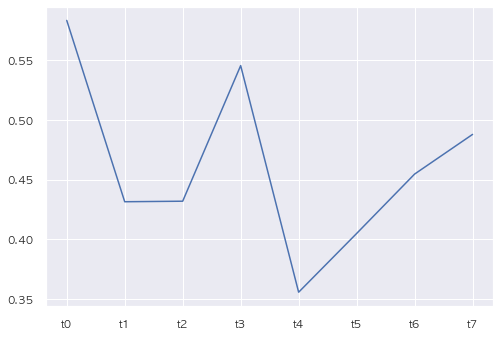

김재환


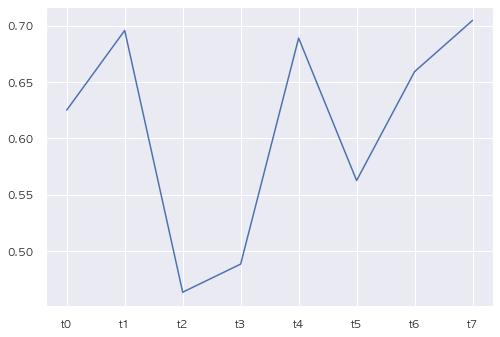

김현수


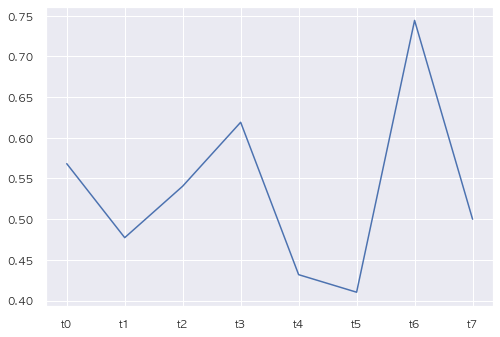

로맥


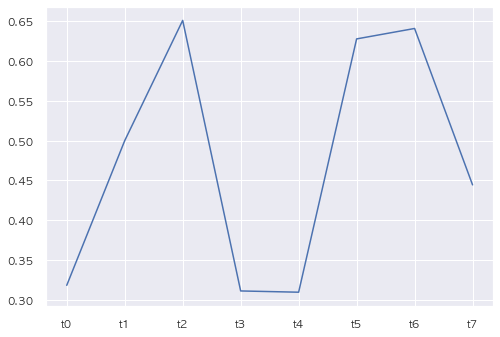

박건우


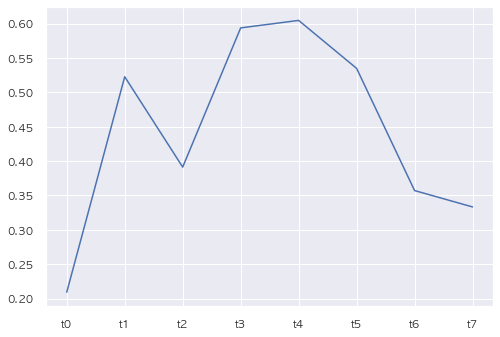

양의지


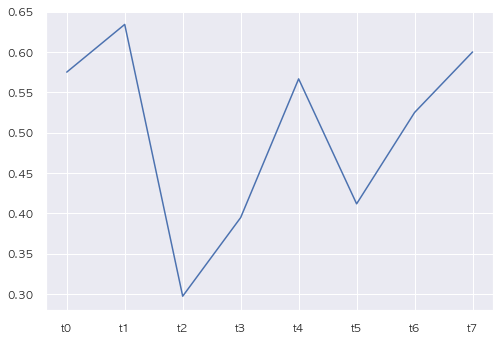

이정후


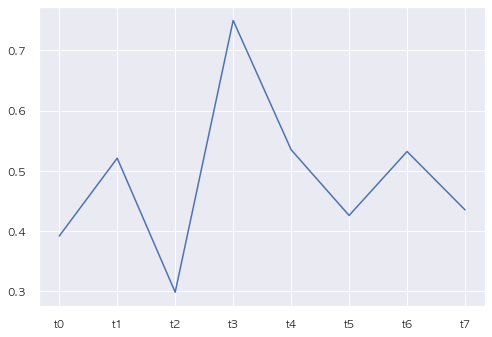

전준우


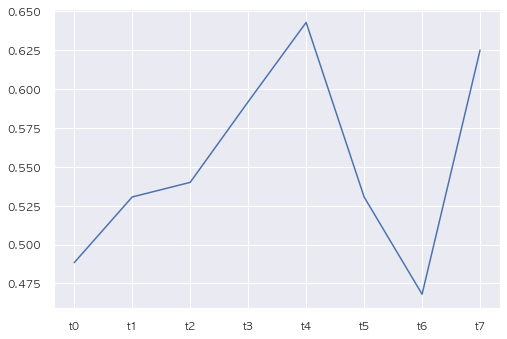

채은성


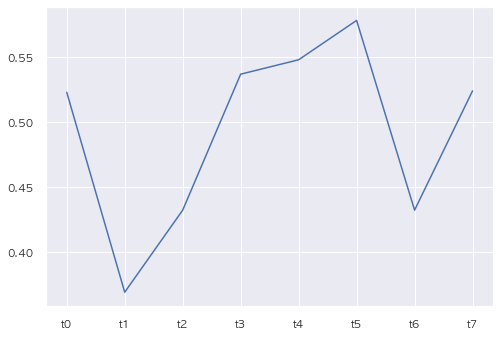

최정


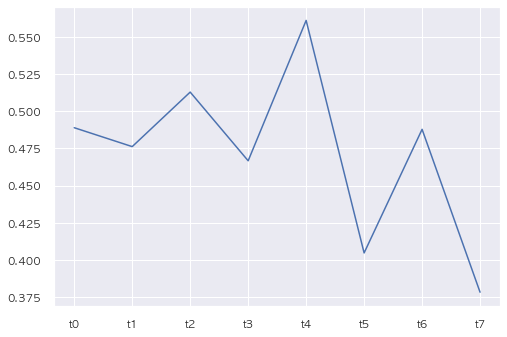

In [26]:
for i in range(len(target)):
    print(seqs[seqs.index.isin(target)].index[i])
    seqs[seqs.index.isin(target)].iloc[i,:].plot()
    plt.show()

In [232]:
target

['강백호', '김재환', '김현수', '로맥', '박건우', '양의지', '전준우', '채은성', '최정', '이정후']

In [27]:
x_test = pd.read_csv(os.path.join('../dataset', 'baseball_test_final.csv'))

In [28]:
x_test

,PCODE,NAME,year,선발,타수,득점,안타,2타,3타,홈런,...,희비,투구,barrel,start_date,end_date,gap,게임수,출루,장타,series_index
0,67341.0,이정후,2021,14,54,6,19,4,0,0,...,0,251,3.0,2021-06-26,2021-08-14,-49 days,15,NaN,NaN,t0
1,67872.0,로맥,2021,10,38,5,8,1,0,1,...,0,193,0.0,2021-07-11,2021-09-08,-59 days,15,NaN,NaN,t0
2,68050.0,강백호,2021,14,56,8,16,6,0,3,...,5,260,4.0,2021-08-18,2021-09-08,-21 days,15,NaN,NaN,t0
3,75847.0,최정,2021,14,44,9,10,2,1,4,...,3,214,5.0,2021-08-20,2021-09-08,-19 days,15,NaN,NaN,t0
4,76232.0,양의지,2021,15,52,7,15,5,0,2,...,0,238,7.0,2021-08-20,2021-09-08,-19 days,15,NaN,NaN,t0
5,78224.0,김재환,2021,15,53,6,15,3,0,1,...,1,224,5.0,2021-08-21,2021-09-08,-18 days,15,NaN,NaN,t0
6,78513.0,전준우,2021,14,56,10,15,4,0,1,...,2,218,7.0,2021-08-18,2021-09-08,-21 days,15,NaN,NaN,t0
7,79192.0,채은성,2021,15,54,13,18,3,0,4,...,3,250,9.0,2021-06-19,2021-09-08,-81 days,15,NaN,NaN,t0
8,76290.0,김현수,2021,15,49,4,14,4,1,0,...,1,204,6.0,2021-08-18,2021-09-08,-21 days,15,NaN,NaN,t0
9,79215.0,박건우,2021,15,50,8,14,2,0,0,...,0,223,4.0,2021-08-21,2021-09-08,-18 days,15,NaN,NaN,t0


In [5]:
df = pd.read_csv('../dataset/total_baseball_PCODE&배럴타구추가.csv')
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(str(x)))
df.head()

,NAME,날짜,상대,결과,점수,타순,P,선발,타수,득점,...,장타,OPS,투구,avLI,RE24,WPA,year,Date,PCODE,barrel
0,정훈,429,한화,W,4:3,7,3B,1,2,0,...,0.000,0.000,8,1.51,-0.72,-0.046,2018,2018-04-29,60523.0,0.0
1,정훈,502,KIA,L,6:12,6,1B,1,4,0,...,0.250,0.361,12,1.09,-0.33,-0.032,2018,2018-05-02,60523.0,0.0
2,정훈,504,@SK,L,4:5,9,PH,0,1,1,...,0.800,1.073,3,0.44,1.00,0.025,2018,2018-05-04,60523.0,1.0
3,정훈,508,@LG,W,4:2,5,PH,0,1,0,...,0.750,1.058,6,0.49,-0.26,-0.013,2018,2018-05-08,60523.0,0.0
4,정훈,510,@LG,W,7:2,9,PH,0,1,0,...,0.667,0.979,3,0.02,-0.26,-0.001,2018,2018-05-10,60523.0,1.0


In [10]:
target

['강백호', '김재환', '김현수', '로맥', '박건우', '양의지', '전준우', '채은성', '최정', '이정후']

강백호


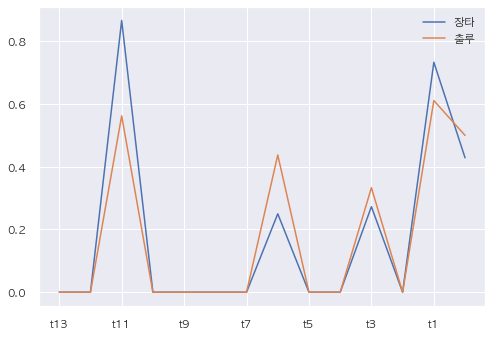

In [35]:
make_date_series(df[(df.NAME=='강백호')&(df.year==2020)],12)[['장타','출루']].plot()
plt.show()

In [105]:
target_nan = {'이정후':67341, '로맥':67872, '채은성':79192}

In [106]:
def find_simirity(df, window_size, target):
    
    from collections import defaultdict
    tot_players = defaultdict(list)
    
    def vector(pcode, year, ws):
        return np.array(make_date_series(df[(df.PCODE==pcode)&(df.year==year)], ws)[['장타','출루']])
    
    def input_sim(name, target, vec, player, year):
        tot_players[f'{name}_장타'].append((f'{player}_{year}', np.dot(target[:,0], vec[:,0])))
        tot_players[f'{name}_출루'].append((f'{player}_{year}', np.dot(target[:,1], vec[:,1])))
    
    
    target_arr = {'이정후': vector(target['이정후'], 2021, window_size), 
                 '로맥': vector(target['로맥'], 2021, window_size),
                  '채은성':vector(target['채은성'], 2021, window_size)
                 }
    for name, val in target_arr.items():
        print(name,val.shape)
    

    
    
    for year in [2018,2019,2020,2021]:
        players=df[df['year']==year].PCODE.unique()
        
        for player in players:
            try:
                p = vector(player, year, window_size)
                input_sim('이정후',target_arr['이정후'], p, player, year)
                input_sim('로맥',target_arr['로맥'], p, player, year)
                input_sim('채은성',target_arr['채은성'], p, player, year)
            except:
                print(player, year,p.shape)
                
    
    
    return tot_players

In [107]:
result = find_simirity(df, 1, target_nan)

이정후
로맥
채은성
이정후 (159, 2)
로맥 (159, 2)
채은성 (159, 2)
정훈
오태곤
유강남
김재율
이천웅
최영진
김동한
고종욱
김헌곤
김민하
김사훈
윤정우
강경학
오준혁
정진기
윤병호
서상우
류지혁
박세혁
유민상
김규민
구자욱
박찬도
박해민
신본기
하주석
양성우
박승욱
김민식
최항
최정민
박민우
황윤호
강진성
노진혁
김성욱
나성범
강승호
김인태
이우성
정현
노수광
한승택
권희동
심우준
안중열
양석환
김하성
임병욱
백승민
이창진
강한울
지성준
김태진
64984.0 2018 (159, 2)
안익훈
박지규
송성문
전병우
조수행
주효상
나경민
류승현
김태연
장진혁
김동엽
김찬형
도태훈
이재율
로하스
김혜성
이정후
초이스
러프
번즈
버나디나
로맥
박성한
스크럭스
강백호
파레디스
반슬라이크
샌즈
한동희
호잉
정은원
김형준
김주찬
박기혁
이범호
이성우
박한이
최준석
이대호
김강민
정상호
박용택
최형우
손주인
조동찬
문규현
박경수
이성열
나주환
손시헌
지석훈
이종욱
이택근
서동욱
이용규
김재호
유한준
박석민
강민호
최진행
임훈
박정권
74846.0 2018 (159, 2)
정의윤
오재일
정근우
최정
최승준
양의지
민병헌
최주환
황재균
유재신
김문호
정범모
송광민
오재원
채태인
손아섭
김민성
이형종
서건창
김용의
김재환
최재훈
전민수
전준우
장성우
김선빈
나지완
백용환
김지열
오선진
모창민
오지환
정주현
채은성
윤진호
정수빈
허경민
장영석
박헌도
박동원
이지영
배영섭
안치홍
김회성
이해창
이상호
홍재호
정진호
이원재
WO김재현
SK김재현
윤수강
한동민
백민기
조홍석
박준태
김민혁
김성훈
최원준
이동훈
가르시아
김태균
윤석민
박병호
이원석
이병규
김현수
김태완
김성현
이재원
이명기
박건우
김지수
김상수
정성훈
이진영
정훈
오태곤
유강남
정병곤
이천웅
최영진
김동한
고종욱
김헌곤
김민하
허일
강경학
류지혁
박세혁
유민상
박정음
김규민
구자욱
박찬도
박해민
신본기
김준태
양성우
박승욱
김민식
최항
박민우
황윤호
강진성
노진혁
김성욱
나성범
김진곤
강승호
장승현
김인

In [108]:
interpolation_time = 24
y = '장타'
feature = ['선발', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', 
           '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', 
           '희타', '희비', '투구', 'barrel', '타율', 'LG', 'KIA', 'KT', 
           '키움', '두산', '한화', 'NC', '롯데', '삼성', 'SSG', '홈경기수', 
           '원정경기수']

In [109]:
def interpolate_ts(result, ts, rank):
    interpolation_time = range(0,ts)

    feature = ['선발', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', 
           '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', 
           '희타', '희비', '투구', 'barrel', '타율', 'LG', 'KIA', 'KT', 
           '키움', '두산', '한화', 'NC', '롯데', '삼성', 'SSG', '홈경기수', 
           '원정경기수']
    
    history = {'이정후':[],'로맥':[],'채은성':[]}
    
    
    ev = make_date_series(df[(df.PCODE==target_nan['이정후'])&(df.year==2021)],1)[feature][::-1].iloc[interpolation_time]
    
            
    for pcode, val in sorted(result['이정후_장타'], key=lambda x: x[1], reverse=True)[:rank]:
        ev += make_date_series(df[(df.PCODE==int(pcode[:5]))&(df.year==int(pcode[8:]))],1)[feature][::-1].iloc[interpolation_time]
        
    history['이정후'] = ev.div(rank).round(0).sum(axis=0).T
    
    
    
    ev = make_date_series(df[(df.PCODE==target_nan['로맥'])&(df.year==2021)],1)[feature][::-1].iloc[interpolation_time]
    
    

    for pcode, val in sorted(result['로맥_장타'], key=lambda x: x[1], reverse=True)[:rank]:
        ev += make_date_series(df[(df.PCODE==int(pcode[:5]))&(df.year==int(pcode[8:]))],1)[feature][::-1].iloc[interpolation_time] 
        
    history['로맥'] = ev.div(rank).round(0).sum(axis=0).T
    
    
    ev = make_date_series(df[(df.PCODE==target_nan['채은성'])&(df.year==2021)],1)[feature][::-1].iloc[interpolation_time]
    
    


    for pcode, val in sorted(result['채은성_장타'], key=lambda x: x[1], reverse=True)[:rank]:
        ev += make_date_series(df[(df.PCODE==int(pcode[:5]))&(df.year==int(pcode[8:]))],1)[feature][::-1].iloc[interpolation_time] 
        
    history['채은성'] = ev.div(rank).round(0).sum(axis=0).T
    
    return history
    

In [110]:
his=interpolate_ts(result, 24, 20)

이정후
양의지
강진성
이정후
나성범
이정후
로하스
김재환
윤석민
이택근
로맥
이원재
로맥
손아섭
안치홍
김민식
버나디나
김현수
정훈
김하성
김하성
로맥
로맥
이택근
최진행
강진성
양의지
김하성
이정후
김용의
김재환
라모스
나성범
이원재
박동원
최형우
박경수
이대호
박민우
나성범
손아섭
최형우
채은성
강진성
이정후
로맥
이성규
이원재
로맥
채은성
김민식
최진행
이명기
유한준
정은원
김하성
장승현
터커
나성범
채은성
이정후
로하스
김병희


In [111]:
his

{'이정후': 선발         4.0
 타수        15.0
 득점         3.0
 안타         6.0
 2타         0.0
 3타         0.0
 홈런         0.0
 루타         8.0
 타점         3.0
 도루         0.0
 도실         0.0
 볼넷         1.0
 사구         0.0
 고4         0.0
 삼진         1.0
 병살         0.0
 희타         0.0
 희비         0.0
 투구        66.0
 barrel     0.0
 타율         0.0
 LG         0.0
 KIA        0.0
 KT         0.0
 키움         0.0
 두산         0.0
 한화         0.0
 NC         0.0
 롯데         0.0
 삼성         0.0
 SSG        0.0
 홈경기수       0.0
 원정경기수      1.0
 dtype: float64,
 '로맥': 선발         4.0
 타수        16.0
 득점         1.0
 안타         4.0
 2타         0.0
 3타         0.0
 홈런         0.0
 루타         7.0
 타점         2.0
 도루         0.0
 도실         0.0
 볼넷         1.0
 사구         0.0
 고4         0.0
 삼진         4.0
 병살         0.0
 희타         0.0
 희비         0.0
 투구        69.0
 barrel     0.0
 타율         0.0
 LG         0.0
 KIA        0.0
 KT         0.0
 키움         0.0
 두산         0.0
 한화         0.0
 NC       

In [9]:
tot = []
for year in [2018,2019,2020,2021]:
    for p in df[(df.year==year)].PCODE.unique():
        tot.append(make_time_series_barrel(df[(df.PCODE==p)&(df.year==year)],7))
st = reduce(lambda left, right: pd.concat([left,right]), tot)



In [11]:
st.dropna().to_csv('../dataset/temp_ws_7.csv')

In [10]:
#st

,PCODE,선발,타수,득점,안타,2타,3타,홈런,루타,타점,...,두산,한화,NC,롯데,삼성,SSG,홈경기수,원정경기수,장타,출루
t1,60523.0,3,18,4,8,1,0,1,12,3,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,NaN,NaN
t2,60523.0,0,7,3,3,1,1,0,6,3,...,1.0,1.0,1.0,0.0,1.0,1.0,3.0,4.0,0.777778,0.578947
t3,60523.0,3,15,0,5,0,0,0,5,1,...,2.0,0.0,2.0,0.0,1.0,1.0,3.0,4.0,1.142857,0.750000
t4,60523.0,1,11,2,5,1,0,1,9,3,...,1.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,0.333333,0.333333
t5,60523.0,4,19,2,5,1,0,0,6,0,...,0.0,1.0,2.0,0.0,0.0,1.0,3.0,4.0,1.000000,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t10,79402.0,7,25,1,4,1,0,0,5,4,...,1.0,1.0,1.0,1.0,0.0,0.0,4.0,3.0,0.500000,0.458333
t11,79402.0,7,20,0,2,0,0,0,2,1,...,1.0,0.0,1.0,0.0,0.0,1.0,4.0,3.0,0.240000,0.192308
t12,79402.0,7,27,3,5,1,0,0,6,0,...,0.0,1.0,2.0,2.0,0.0,0.0,5.0,2.0,0.100000,0.136364
t13,79402.0,6,21,5,6,0,0,0,6,0,...,0.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,0.259259,0.300000


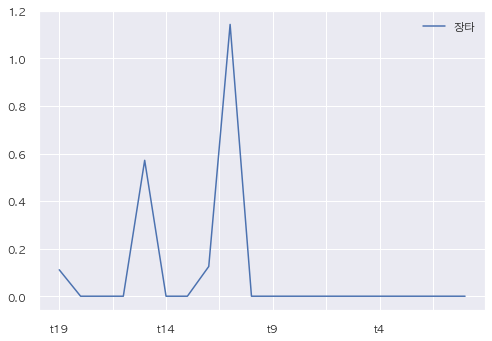

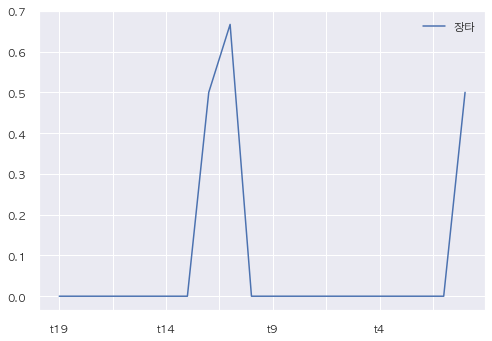

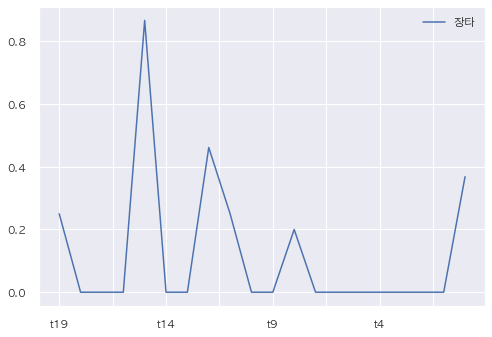

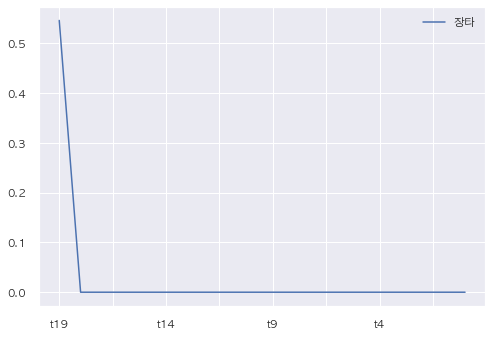

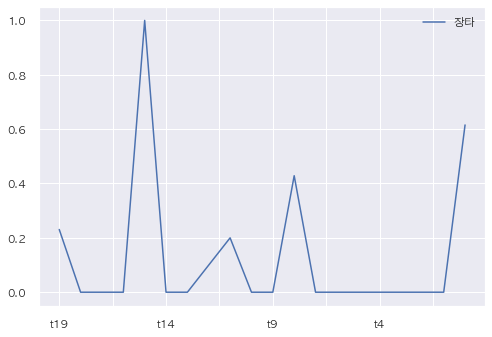

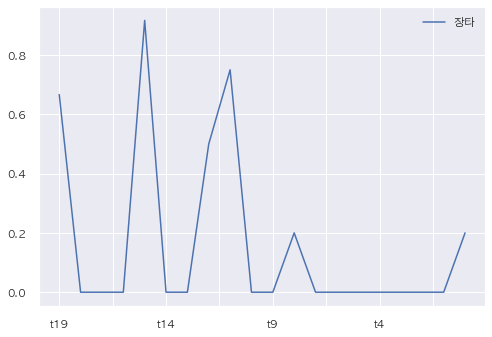

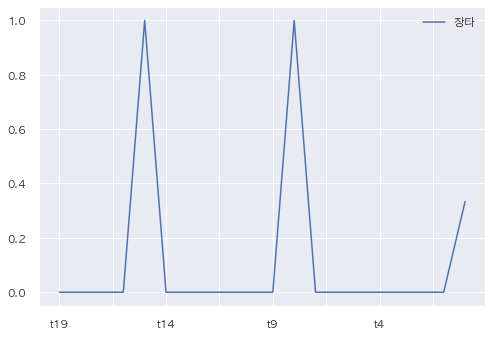

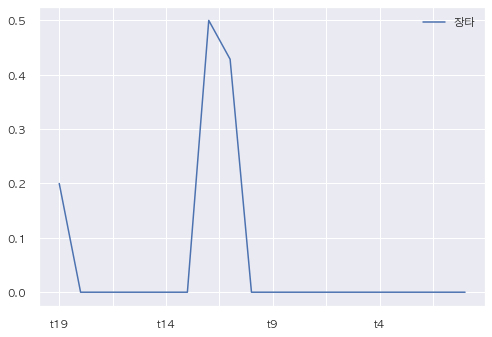

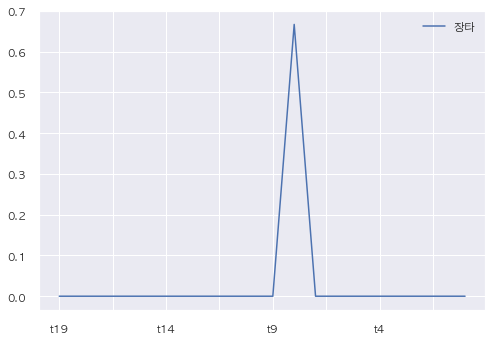

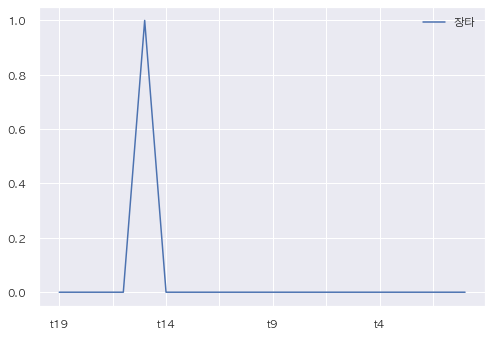

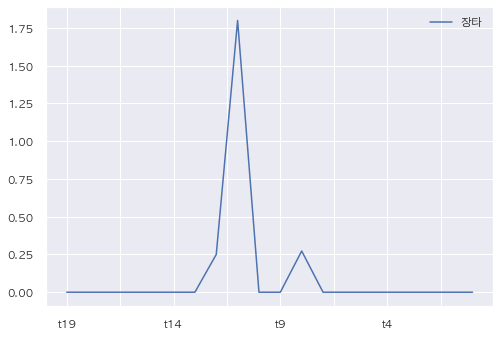

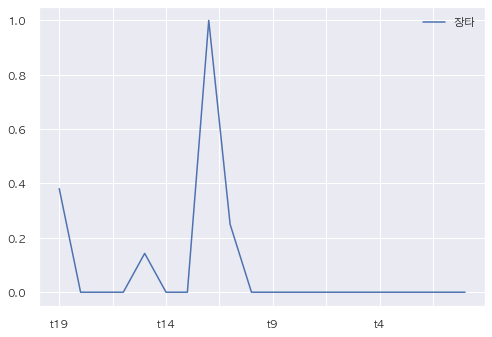

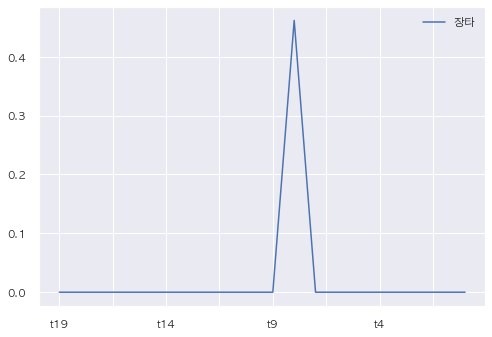

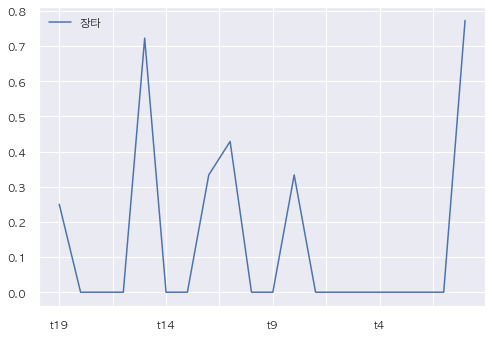

IndexError: single positional indexer is out-of-bounds

In [817]:
for play in df[df.year==2021].PCODE.unique():
    make_date_series(df[(df.PCODE==play)&(df.year==2021)],8)[['장타']].plot()
    plt.show()

In [9]:
single = []
for year in [2018,2019,2020,2021]:
    single.append(make_date_series(df[(df.PCODE==68050)&(df.year==year)],1))
s = reduce(lambda left, right: pd.concat([left,right]), single)


강백호


KeyError: "['KT', '원정경기수', '홈경기수', 'SSG', '롯데', '두산', '한화', '키움', 'NC', '삼성', 'KIA', 'LG'] not in index"

In [27]:
#s.dropna().to_csv('../dataset/강백호68050.csv', index=False)

In [30]:
dataset_game

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t2,로맥,2018,3,0,0,2,1,1,0,1,4,0,20,0,80,7,5,0.318182,0.550000
t3,로맥,2018,8,1,0,3,0,2,0,0,4,0,22,0,96,18,5,0.318182,0.550000
t4,로맥,2018,2,0,0,0,0,7,0,0,2,0,15,1,105,6,5,0.583333,1.000000
t5,로맥,2018,10,0,0,0,1,4,0,0,1,0,16,0,75,4,5,0.409091,0.133333
t6,로맥,2018,7,1,0,2,2,1,0,0,3,0,19,0,85,4,5,0.714286,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t2,민병헌,2021,3,1,0,0,0,3,0,0,5,1,18,0,85,12,5,0.444444,0.285714
t2,이해창,2021,3,0,0,0,0,1,0,0,4,0,17,0,58,14,5,0.470588,0.687500
t2,김수환,2021,1,1,0,0,0,0,0,1,7,0,16,0,64,24,5,0.500000,0.687500
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10,5,0.583333,0.666667


In [112]:
his.keys()

dict_keys(['이정후', '로맥', '채은성'])

In [113]:
def eval_raw(name):
    eval_r = []
    for y in [2018,2019,2020]:
        eval_r.append(make_date_series(df[(df.PCODE==target_nan[name])&
                             (df.year==y)],1)[feature][::-1].iloc[
            range(0,interpolation_time)].sum())
    return eval_r

In [153]:
eval_r= eval_raw('채은성')

채은성
채은성
채은성


In [154]:
his_eh=(his['채은성'] +eval_r[0]*2+ eval_r[1]*2).div(5).round(0)
his_eh

선발         4.0
타수        14.0
득점         2.0
안타         4.0
2타         1.0
3타         0.0
홈런         0.0
루타         7.0
타점         3.0
도루         0.0
도실         0.0
볼넷         0.0
사구         0.0
고4         0.0
삼진         3.0
병살         0.0
희타         0.0
희비         0.0
투구        57.0
barrel     2.0
타율         1.0
LG         0.0
KIA        0.0
KT         0.0
키움         0.0
두산         0.0
한화         0.0
NC         1.0
롯데         0.0
삼성         0.0
SSG        0.0
홈경기수       2.0
원정경기수      1.0
dtype: float64

In [155]:
eval_r=eval_raw('로맥')

로맥
로맥
로맥


In [156]:
eval_r[1]

선발         2.000
타수         5.000
득점         0.000
안타         1.000
2타         0.000
3타         0.000
홈런         0.000
루타         1.000
타점         0.000
도루         0.000
도실         0.000
볼넷         0.000
사구         1.000
고4         0.000
삼진         3.000
병살         0.000
희타         0.000
희비         0.000
투구        29.000
barrel     0.000
타율         0.534
LG         0.000
KIA        0.000
KT         0.000
키움         0.000
두산         0.000
한화         0.000
NC         1.000
롯데         0.000
삼성         0.000
SSG        0.000
홈경기수       1.000
원정경기수      1.000
dtype: float64

In [157]:
his_rm=(his['로맥'] + eval_r[0] + eval_r[1] + eval_r[2]*2).div(5).round(0)
his_rm

선발         5.0
타수        17.0
득점         3.0
안타         5.0
2타         0.0
3타         0.0
홈런         1.0
루타        10.0
타점         3.0
도루         0.0
도실         0.0
볼넷         1.0
사구         1.0
고4         0.0
삼진         5.0
병살         0.0
희타         0.0
희비         0.0
투구        78.0
barrel     2.0
타율         1.0
LG         0.0
KIA        0.0
KT         0.0
키움         1.0
두산         1.0
한화         0.0
NC         0.0
롯데         0.0
삼성         0.0
SSG        0.0
홈경기수       2.0
원정경기수      3.0
dtype: float64

In [158]:
eval_r=eval_raw('이정후')

이정후
이정후
이정후


In [159]:
eval_r[0]

선발          5.000
타수         23.000
득점          2.000
안타          4.000
2타          0.000
3타          0.000
홈런          0.000
루타          4.000
타점          3.000
도루          0.000
도실          1.000
볼넷          2.000
사구          0.000
고4          0.000
삼진          3.000
병살          0.000
희타          0.000
희비          0.000
투구        101.000
barrel      1.000
타율          1.873
LG          0.000
KIA         2.000
KT          3.000
키움          0.000
두산          0.000
한화          0.000
NC          0.000
롯데          0.000
삼성          0.000
SSG         2.000
홈경기수        1.000
원정경기수       4.000
dtype: float64

In [160]:
his_jh=(his['이정후'] + eval_r[0] + eval_r[1]*2 + eval_r[2]*2).div(6).round(0)

In [191]:
test_target = pd.DataFrame(columns=['PCODE','NAME']+feature)
test_target = []

In [192]:
# his_jh
# his_rm
# his_eh
# for p, n, data in zip(target_nan.items(),[his_jh,his_rm, his_eh]):
# #     test_target.appned(target_nan['이정후'], '이정후', data)
#     data
test_target.append(['이정후']+ [target_nan['이정후']]+ list(his_jh))
test_target.append(['로맥']+ [target_nan['로맥']]+ list(his_rm))
test_target.append(['채은성']+ [target_nan['채은성']]+ list(his_eh))

SyntaxError: invalid syntax (<ipython-input-192-c1a28622e60b>, line 7)

In [176]:
final_test=pd.DataFrame(columns=['NAME','PCODE']+feature, data=test_target)
final_test

,NAME,PCODE,선발,타수,득점,안타,2타,3타,홈런,루타,...,KT,키움,두산,한화,NC,롯데,삼성,SSG,홈경기수,원정경기수
0,이정후,67341,5.0,19.0,4.0,7.0,1.0,0.0,0.0,9.0,...,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0
1,로맥,67872,5.0,17.0,3.0,5.0,0.0,0.0,1.0,10.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
2,채은성,79192,4.0,14.0,2.0,4.0,1.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


In [177]:
#final_test.to_csv('../dataset/test_non.csv',index=False)

In [123]:
df.columns

Index(['NAME', '날짜', '상대', '결과', '점수', '타순', 'P', '선발', '타수', '득점', '안타', '2타',
       '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타',
       '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA', 'year',
       'Date', 'PCODE', 'barrel', 'LG', 'KIA', 'KT', '키움', '두산', '한화', 'NC',
       '롯데', '삼성', 'SSG', '홈경기수', '원정경기수'],
      dtype='object')

In [6]:
def opposing_team(df):
    df1 = df.reset_index().groupby(['index', 'NAME', "Date", "상대"]).size().unstack().reset_index().fillna(0).set_index('index')

    df1['원정경기수'] = df1["@KIA"] + df1["@KT"] + df1['@LG'] + df1['@NC'] + df1['@SK'] + \
                    df1['@SSG'] + df1['@넥센'] + df1['@두산'] + df1['@롯데'] + \
                    df1['@삼성'] + df1['@키움'] + df1['@한화']
    df1['홈경기수'] = df1["KIA"] + df1["KT"] + df1['LG'] + df1['NC'] + df1['SK'] + \
                    df1['SSG'] + df1['넥센'] + df1['두산'] + df1['롯데'] + \
                    df1['삼성'] + df1['키움'] + df1['한화']
    df1['LG'] = df1['LG'] + df1["@LG"]
    df1['KIA'] = df1['KIA'] + df1["@KIA"]
    df1['KT'] = df1['KT'] + df1["@KIA"]
    df1['키움'] = df1['키움'] + df1["@키움"] + df1['넥센'] + df1['@넥센']
    df1['두산'] = df1['두산'] + df1["@두산"]
    df1['한화'] = df1['한화'] + df1["@한화"]
    df1['NC'] = df1['NC'] + df1["@NC"]
    df1['롯데'] = df1['롯데'] + df1["@롯데"]
    df1['삼성'] = df1['삼성'] + df1["@삼성"]
    df1['SSG'] = df1['SSG'] + df1['@SSG'] + df1['@SK'] + df1["SK"]
    df1 = df1[['NAME', 'Date', 'LG', 'KIA', 'KT', '키움', '두산', '한화', 'NC', '롯데', '삼성', 'SSG', '홈경기수', '원정경기수']]
    
    return df.join(df1.iloc[:, 2:])

In [7]:
df =opposing_team(df)

In [8]:
df

,NAME,날짜,상대,결과,점수,타순,P,선발,타수,득점,...,KT,키움,두산,한화,NC,롯데,삼성,SSG,홈경기수,원정경기수
0,정훈,429,한화,W,4:3,7,3B,1,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,정훈,502,KIA,L,6:12,6,1B,1,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,정훈,504,@SK,L,4:5,9,PH,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,정훈,508,@LG,W,4:2,5,PH,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,정훈,510,@LG,W,7:2,9,PH,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63447,김상수,829,@KT,L,3:8,9,2B,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63448,김상수,901,키움,W,7:1,9,2B,1,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63449,김상수,903,@KIA,W,9:3,6,2B,1,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63450,김상수,905,두산,L,5:6,9,2B,1,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
def make_date_series(df, day):


    start = dt.date(df.year.unique()[0], 4, 3)
    end = dt.date(df.year.unique()[0], 9, 8)
    print(f'{df.NAME.unique()[0]}')
    df = df[(df.Date.dt.day >= start.day) & (df.Date.dt.month >= start.month) &
            (df.Date.dt.day <= end.day) & (df.Date.dt.month <= end.month)]

    if df["Date"].iloc[0] != start:
        df.loc[-1] = 0
        df.loc[-1, 'Date'] = pd.to_datetime(start)
        df.index = df.index + 1
        df.sort_index(inplace=True)

    if df["Date"].iloc[-1] != end:
        df.loc[len(df) + 1] = 0
        df.loc[len(df), 'Date'] = pd.to_datetime(end)

    df_resample = df.set_index('Date').resample(f'{day}D').sum().reset_index()

    X_demo = ['PCODE', 'NAME']

    X_feature = ['선발', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', 
           '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', 
           '희타', '희비', '투구', 'barrel', '타율', 'LG', 'KIA', 'KT', 
           '키움', '두산', '한화', 'NC', '롯데', '삼성', 'SSG', '홈경기수', 
           '원정경기수','장타', '출루']

    on_base = ['안타', '2타', '3타', '홈런', '사구', '볼넷', '고4']
    total_base = ['타수', '볼넷', '고4', '사구', '희타']
    hit = ['안타', '2타', '3타', '홈런']

    df_resample['출루'] = df_resample[on_base].sum(axis=1) / df_resample[total_base].sum(axis=1)
    df_resample['장타'] = (df_resample[hit] * [1, 2, 3, 4]).sum(axis=1) / df_resample['타수']

    df_resample['PCODE'] = [df['PCODE'].unique().astype(int)[0] for _ in range(df_resample.shape[0])]
    df_resample['NAME'] = [df['NAME'].unique().astype(object)[0] for _ in range(df_resample.shape[0])]
    df_resample.index = [f't{i}' for i in range(df_resample.shape[0])][::-1]

    df_resample[['장타', '출루']] = df_resample[['장타', '출루']].fillna(0)

    df_resample['장타'] = list(df_resample['장타'].iloc[1:]) + [None]
    df_resample['출루'] = list(df_resample['출루'].iloc[1:]) + [None]
    
    
    return df_resample[X_demo + X_feature]

In [200]:
test = pd.read_csv('../dataset/baseball_test_final4.csv')

In [208]:
test[test.NAME=='채은성'][demo + feature] = final_test[final_test.NAME=='채은성'][demo + feature]

In [212]:
test[test.NAME=='로맥'][demo + feature] = final_test[final_test.NAME=='로맥'][demo + feature]


In [195]:
final_test.PCODE=final_test.PCODE.astype('float64')

In [215]:
test[test.NAME=='이정후'][demo + feature]=final_test[final_test.NAME=='이정후'][demo + feature]

In [203]:
demo = ['NAME','PCODE']

In [216]:
test

,NAME,PCODE,선발,타수,득점,안타,2타,3타,홈런,루타,...,KT,키움,두산,한화,NC,롯데,삼성,SSG,홈경기수,원정경기수
0,강백호,68050.0,15,60,8,18,8,0,3,35,...,0.0,1.0,0.0,1.0,0.0,3.0,2.0,3.0,9.0,7.0
1,김재환,78224.0,18,65,6,17,4,0,1,24,...,0.0,1.0,0.0,4.0,3.0,2.0,2.0,2.0,9.0,9.0
2,김현수,76290.0,16,54,5,16,4,1,1,25,...,2.0,2.0,0.0,0.0,4.0,1.0,3.0,1.0,9.0,7.0
3,로맥,67872.0,4,20,3,3,1,0,1,7,...,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,7.0,2.0
4,박건우,79215.0,18,63,15,20,5,0,1,28,...,0.0,1.0,0.0,4.0,3.0,2.0,2.0,2.0,9.0,9.0
5,양의지,76232.0,16,57,8,17,5,0,2,28,...,0.0,0.0,3.0,4.0,0.0,2.0,0.0,3.0,9.0,7.0
6,전준우,78513.0,15,60,10,15,4,0,1,22,...,5.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,10.0,6.0
7,채은성,79192.0,2,8,1,1,1,0,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8,최정,75847.0,16,51,12,15,2,1,6,37,...,0.0,2.0,2.0,0.0,4.0,0.0,3.0,0.0,9.0,8.0


In [225]:
test.merge(final_test[final_test.NAME=='이정후'][demo + feature])

,NAME,PCODE,선발,타수,득점,안타,2타,3타,홈런,루타,...,KT,키움,두산,한화,NC,롯데,삼성,SSG,홈경기수,원정경기수


In [231]:
final=pd.concat([test,final_test[final_test.NAME=='이정후'][demo + feature]]).reset_index().drop(columns='index')

In [233]:
#final.to_csv('../dataset/baseball_test_final_ip.csv',index=False)